# __Import data__

In [105]:
import pandas as pd
import numpy as np

X_blackbox = pd.read_csv("blackbox_data/X_train.csv")
X_blackbox.drop(columns=['id'], axis=1, inplace=True)
display(X_blackbox.describe())

y = pd.read_csv("blackbox_data/y_train.csv")
y.drop(columns=['id'], axis=1, inplace=True)
display(y.describe())

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
count,1121.000000,1128.000000,1124.000000,1121.000000,1138.000000,1133.000000,1115.000000,1113.000000,1129.000000,1112.000000,...,1122.000000,1128.000000,1117.000000,1116.000000,1102.000000,1111.000000,1117.000000,1120.000000,1132.000000,1116.000000
mean,15220.402957,10950.160761,3430.837498,100002.281022,105.070358,99.968855,9983.055476,10496.207179,10495.835570,9.985880,...,10069.191241,13274.793928,812.316152,104.968652,105.063790,2482.685073,2.725659,1359.981226,1052.256384,9981.085085
std,2314.735855,1570.611458,443.431441,9708.061111,2.834582,9.566001,981.199159,278.859974,288.802549,1.001197,...,964.684756,2160.273617,180.550450,2.805768,2.819128,523.215963,0.263641,265.345180,29.172210,1014.488328
min,5636.623777,6764.060541,1849.453269,65828.916291,100.056578,70.232469,6797.836298,10000.771287,10000.339782,6.759685,...,7109.997185,4100.700865,164.997735,100.040624,100.015930,750.038434,1.590647,663.173673,1000.067137,6383.771227
25%,13846.177869,9859.438276,3152.193184,93497.927859,102.679233,93.586112,9351.114468,10260.607893,10242.516364,9.319323,...,9416.786301,11977.061474,694.099781,102.584331,102.615677,2155.245200,2.537801,1177.188917,1028.203921,9316.722099
50%,15048.467618,10839.483074,3401.539562,100053.800306,105.029940,99.670635,9991.006638,10498.862876,10494.225267,9.970521,...,10064.750764,13160.555394,792.045039,104.969600,105.136788,2459.092168,2.710103,1362.350726,1053.778881,9981.210986
75%,16653.018233,11902.078799,3698.564818,106139.852699,107.516555,106.045433,10588.909713,10732.429943,10734.838005,10.687774,...,10696.714321,14512.572842,925.032457,107.309535,107.407093,2791.051349,2.887536,1535.159914,1077.716726,10647.455420
max,28273.690135,17777.338221,5622.951648,133145.632257,110.087261,130.142499,13865.848591,11000.062311,10999.403374,13.828922,...,13173.145338,24901.251674,1589.225040,110.072565,110.069056,4904.988601,3.795277,2506.104650,1099.975679,13265.026039


,y
count,1212.000000
mean,69.889439
std,9.720843
min,42.000000
25%,64.000000
50%,70.000000
75%,77.000000
max,97.000000


## __Age distribution__

,y
count,1212.000000
mean,69.889439
std,9.720843
min,42.000000
25%,64.000000
50%,70.000000
75%,77.000000
max,97.000000


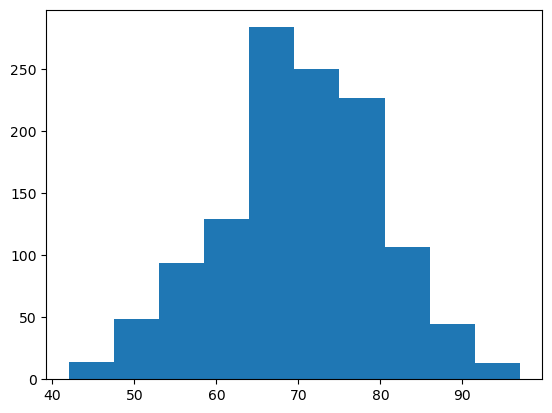

In [106]:
import matplotlib.pyplot as plt

plt.hist(y)

display(y.describe())

## __Extract Cortical Thickness columns__

As described in Aycheh _et al._'s study ([link](https://www.frontiersin.org/journals/aging-neuroscience/articles/10.3389/fnagi.2018.00252/full)), we can use only Cortical Thickness data extracted from brain images for brain age prediction.

In [107]:
desc = X_blackbox.describe().T

thickness_like = desc[(desc["mean"] > 1) & (desc["mean"] < 5)].index

print(thickness_like.shape[0], "features were selected as Cortical Thickness")

# print(thickness_like)

X_ct = X_blackbox[thickness_like]

display(X_ct)

68 features were selected as Cortical Thickness


,x18,x21,x23,x42,x92,x107,x114,x144,x146,x168,...,x721,x734,x745,x748,x766,x769,x777,x801,x817,x828
0,2.816360,2.275955,2.823225,2.373509,2.810519,2.194544,1.614604,2.281324,2.466789,2.054842,...,2.769178,2.512959,2.561577,2.886191,2.110701,2.333374,2.555374,2.305030,2.588126,2.691845
1,2.667390,2.779402,2.677011,2.561528,2.512001,NaN,1.782288,2.537591,2.467671,2.225485,...,2.664608,2.476245,2.695044,2.723722,NaN,2.052895,2.575797,2.384952,2.417485,2.287976
2,2.603299,2.384827,2.702694,2.913000,2.900569,2.375093,1.342122,2.557563,2.309370,2.264333,...,NaN,2.574194,2.534789,2.652784,2.134853,2.334419,2.525839,2.477187,2.476064,2.843706
3,2.576241,2.419814,2.329664,2.737201,2.798566,1.950920,1.373007,2.183934,NaN,2.207446,...,2.338670,2.062485,2.285517,2.248434,1.733016,1.967139,2.279836,2.112389,2.040717,2.732257
4,2.646856,2.727012,2.647249,3.000786,2.908099,2.239014,1.692651,2.376701,2.288323,2.379373,...,2.693380,2.211228,2.540963,2.597508,2.045608,2.152986,2.431158,2.263235,2.316878,2.702908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2.701389,2.836557,2.903442,3.039644,2.744742,2.331269,1.807438,2.506438,2.338400,2.451754,...,2.726903,2.424777,NaN,2.782232,2.149432,2.229835,2.617011,2.533667,2.352558,3.079234
1208,2.634560,2.514813,2.540225,2.796522,2.769824,2.240806,1.572908,2.449435,2.136641,2.422296,...,2.562299,2.259954,2.474671,2.672402,1.924956,2.304004,2.460164,2.306389,2.255477,2.935047
1209,2.747618,2.982608,2.873919,2.794661,2.590935,2.444754,1.707898,2.440884,2.399705,NaN,...,2.597966,2.560814,2.783308,2.746683,2.368872,2.369319,NaN,2.518431,2.485791,NaN
1210,2.560153,2.430717,2.690725,2.797314,2.724816,2.427602,1.560033,2.306632,2.370982,2.017640,...,2.362471,2.385572,2.570085,NaN,2.234898,2.329367,2.578617,2.493086,2.560172,2.731768


## __Impute missing data__

In [108]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_ct_imp = pd.DataFrame(imputer.fit_transform(X_ct), columns=X_ct.columns)

## __Outlier detection (Local Outlier Factor, LOF, on age intervals)__

From the paper: Local Outlier Factor (LOF) is a density-based unsupervised method that identifies outliers relative to their local neighborhood rather than the entire dataset. Since __cortical thickness decreases gradually with age__ (45–91 years in this study), applying LOF across the full range could confound natural age-related variations with anomalies. To account for this, ages were divided into eight intervals (45–49, 50–54, …), and LOF was applied within each interval to detect outliers specific to comparable age groups. This approach helps control for expected age-related differences in cortical thickness.


In [109]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

X_ct_imp.loc[:, "age"] = np.ravel(y)

# --- Define age intervals (42–97 divided 8 intervals)
age_min, age_max = y.min(), y.max()
age_min, age_max = float(age_min.iloc[0]), float(age_max.iloc[0])

n_intervals = 10
bins = np.linspace(age_min, age_max + 1, n_intervals + 1, dtype=int)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(n_intervals)]

X_ct_imp.loc[:, "age_group"] = pd.cut(X_ct_imp["age"], bins=bins, labels=labels, include_lowest=True, right=False)

# --- Apply LOF for each age group
outlier_indices = []
lof_scores = np.zeros(len(X_ct_imp))

for group_label, group_df in X_ct_imp.groupby("age_group"):
    X_group = group_df.drop(columns=["age", "age_group"]).values
    
    # Heuristic: choose k (neighbors) based on group size
    n_neighbors = min(20, max(5, len(group_df) // 10))
    
    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        contamination='auto',
        metric='euclidean'
    )
    
    lof_fit = lof.fit_predict(X_group)
    scores = -lof.negative_outlier_factor_
    
    lof_scores[group_df.index] = scores
    outliers = group_df.index[lof_fit == -1]
    outlier_indices.extend(outliers)


# --- Results summary
X_ct_imp["lof_score"] = lof_scores
X_ct_imp["is_outlier"] = X_ct_imp.index.isin(outlier_indices)

print("Total outliers detected", len(outlier_indices))

summary = X_ct_imp.groupby("age_group")["is_outlier"].sum()
print("\nOutliers per age group:")
print(summary)

# --- Filter data
X_ct_filtered = X_ct_imp.loc[~X_ct_imp["is_outlier"], :].values
X_ct_filtered = pd.DataFrame(X_ct_filtered, columns=X_ct_imp.columns)

y_filtered = X_ct_imp.loc[~X_ct_imp["is_outlier"], "age"].values

display(X_ct_filtered)

Total outliers detected 22

Outliers per age group:
age_group
42-46    3
47-52    2
53-57    2
58-63    3
64-69    4
70-74    3
75-80    1
81-85    1
86-91    1
92-97    2
Name: is_outlier, dtype: int64


/tmp/ipykernel_14491/3147928911.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_label, group_df in X_ct_imp.groupby("age_group"):
/tmp/ipykernel_14491/3147928911.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = X_ct_imp.groupby("age_group")["is_outlier"].sum()


,x18,x21,x23,x42,x92,x107,x114,x144,x146,x168,...,x766,x769,x777,x801,x817,x828,age,age_group,lof_score,is_outlier
0,2.81636,2.275955,2.823225,2.373509,2.810519,2.194544,1.614604,2.281324,2.466789,2.054842,...,2.110701,2.333374,2.555374,2.30503,2.588126,2.691845,74.0,70-74,1.033002,False
1,2.66739,2.779402,2.677011,2.561528,2.512001,2.417916,1.782288,2.537591,2.467671,2.225485,...,2.241035,2.052895,2.575797,2.384952,2.417485,2.287976,51.0,47-52,0.989457,False
2,2.603299,2.384827,2.702694,2.913,2.900569,2.375093,1.342122,2.557563,2.30937,2.264333,...,2.134853,2.334419,2.525839,2.477187,2.476064,2.843706,70.0,70-74,1.001242,False
3,2.576241,2.419814,2.329664,2.737201,2.798566,1.95092,1.373007,2.183934,1.951177,2.207446,...,1.733016,1.967139,2.279836,2.112389,2.040717,2.732257,52.0,47-52,1.228718,False
4,2.646856,2.727012,2.647249,3.000786,2.908099,2.239014,1.692651,2.376701,2.288323,2.379373,...,2.045608,2.152986,2.431158,2.263235,2.316878,2.702908,85.0,81-85,1.038338,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2.701389,2.836557,2.903442,3.039644,2.744742,2.331269,1.807438,2.506438,2.3384,2.451754,...,2.149432,2.229835,2.617011,2.533667,2.352558,3.079234,70.0,70-74,1.040102,False
1186,2.63456,2.514813,2.540225,2.796522,2.769824,2.240806,1.572908,2.449435,2.136641,2.422296,...,1.924956,2.304004,2.460164,2.306389,2.255477,2.935047,86.0,86-91,0.981754,False
1187,2.747618,2.982608,2.873919,2.794661,2.590935,2.444754,1.707898,2.440884,2.399705,2.298936,...,2.368872,2.369319,2.60744,2.518431,2.485791,2.807286,68.0,64-69,1.028114,False
1188,2.560153,2.430717,2.690725,2.797314,2.724816,2.427602,1.560033,2.306632,2.370982,2.01764,...,2.234898,2.329367,2.578617,2.493086,2.560172,2.731768,71.0,70-74,1.06379,False


/tmp/ipykernel_14491/1904561741.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (df_plot.groupby(["age_group", "is_outlier"]).size().reset_index(name="count"))


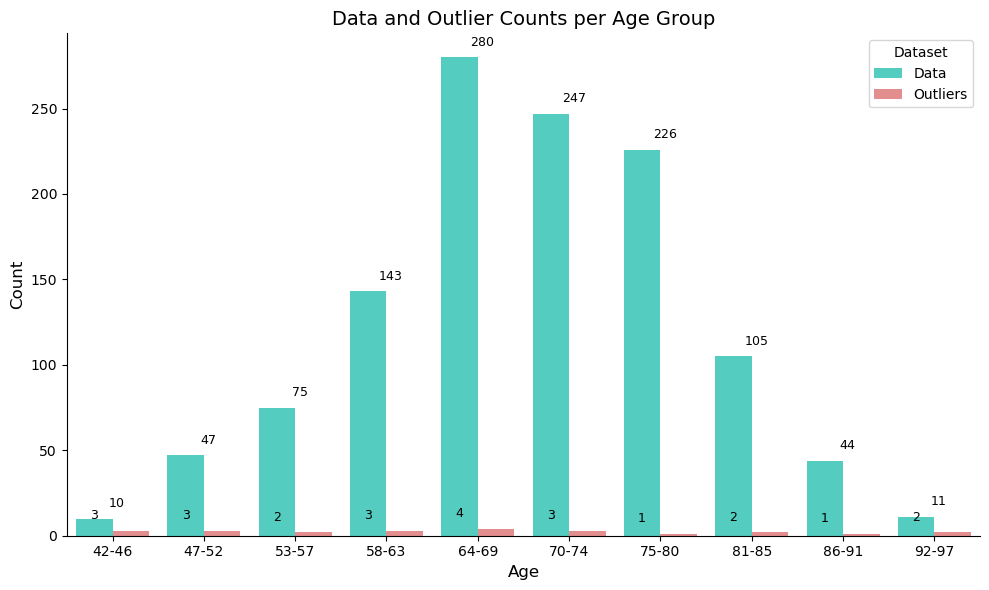

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_plot = X_ct_imp.copy()

# Count per group
counts = (df_plot.groupby(["age_group", "is_outlier"]).size().reset_index(name="count"))

# Label for legend
counts["Dataset"] = counts["is_outlier"].map({False: "Data", True: "Outliers"})

# Ensure age groups are sorted correctly
counts["age_group"] = pd.Categorical(counts["age_group"], categories=sorted(df_plot["age_group"].unique(), key=lambda x: str(x)))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=counts,
    x="age_group",
    y="count",
    hue="Dataset",
    palette={"Data": "turquoise", "Outliers": "lightcoral"}
)

# Add counts on bars
for i, row in counts.iterrows():
    plt.text(
        x=i // 2 + (-0.2 if row["Dataset"] == "Outliers" else 0.05),
        y=row["count"] + 5,
        s=str(row["count"]),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Data and Outlier Counts per Age Group", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Dataset")
sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipykernel_14491/84457083.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (age_group, sub_df) in zip(g.axes.flat, df_density.groupby("age_group")):


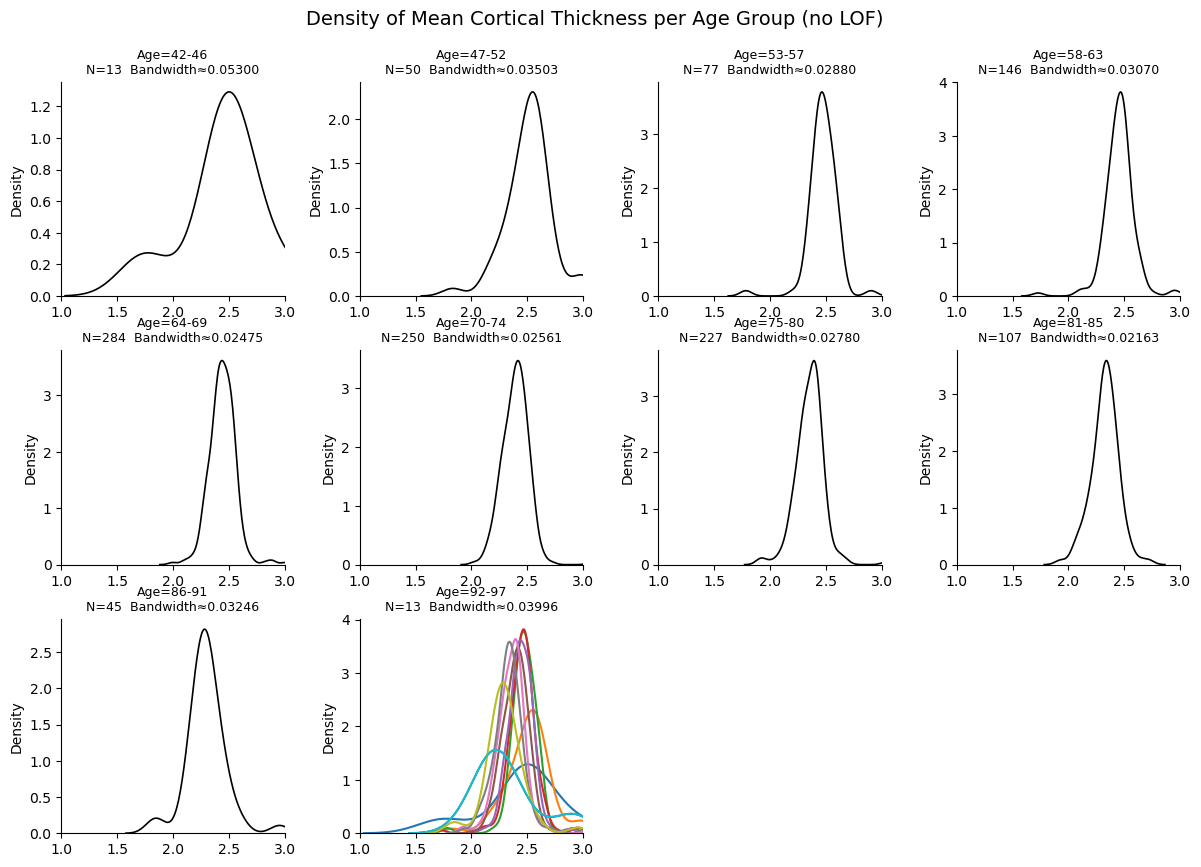

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume X_ct has cortical thickness columns + 'age' + 'age_group'
# Compute mean cortical thickness per subject
thickness_cols = [col for col in X_ct.columns if col not in ["age", "age_group", "is_outlier", "lof_score"]]
X_ct_imp["mean_thickness"] = X_ct[thickness_cols].mean(axis=1)

# Prepare data for plotting
df_density = X_ct_imp[["mean_thickness", "age_group"]].dropna()

# Plot: KDE for each age group
g = sns.FacetGrid(
    df_density,
    col="age_group",
    col_wrap=4,
    sharex=False,
    sharey=False,
    height=3,
)
g.map_dataframe(sns.kdeplot, x="mean_thickness", color="black", lw=1.2)

# Add titles with sample size and bandwidth
for ax, (age_group, sub_df) in zip(g.axes.flat, df_density.groupby("age_group")):
    N = len(sub_df)
    bw = sns.kdeplot(sub_df["mean_thickness"]).get_lines()[-1].get_data()[0].ptp() / 50
    ax.set_title(f"Age={age_group}\nN={N}  Bandwidth≈{bw:.5f}", fontsize=9)
    ax.set_xlabel("")
    ax.set_ylabel("Density")
    ax.set_xlim(1, 3)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Density of Mean Cortical Thickness per Age Group (no LOF)", fontsize=14)
plt.show()


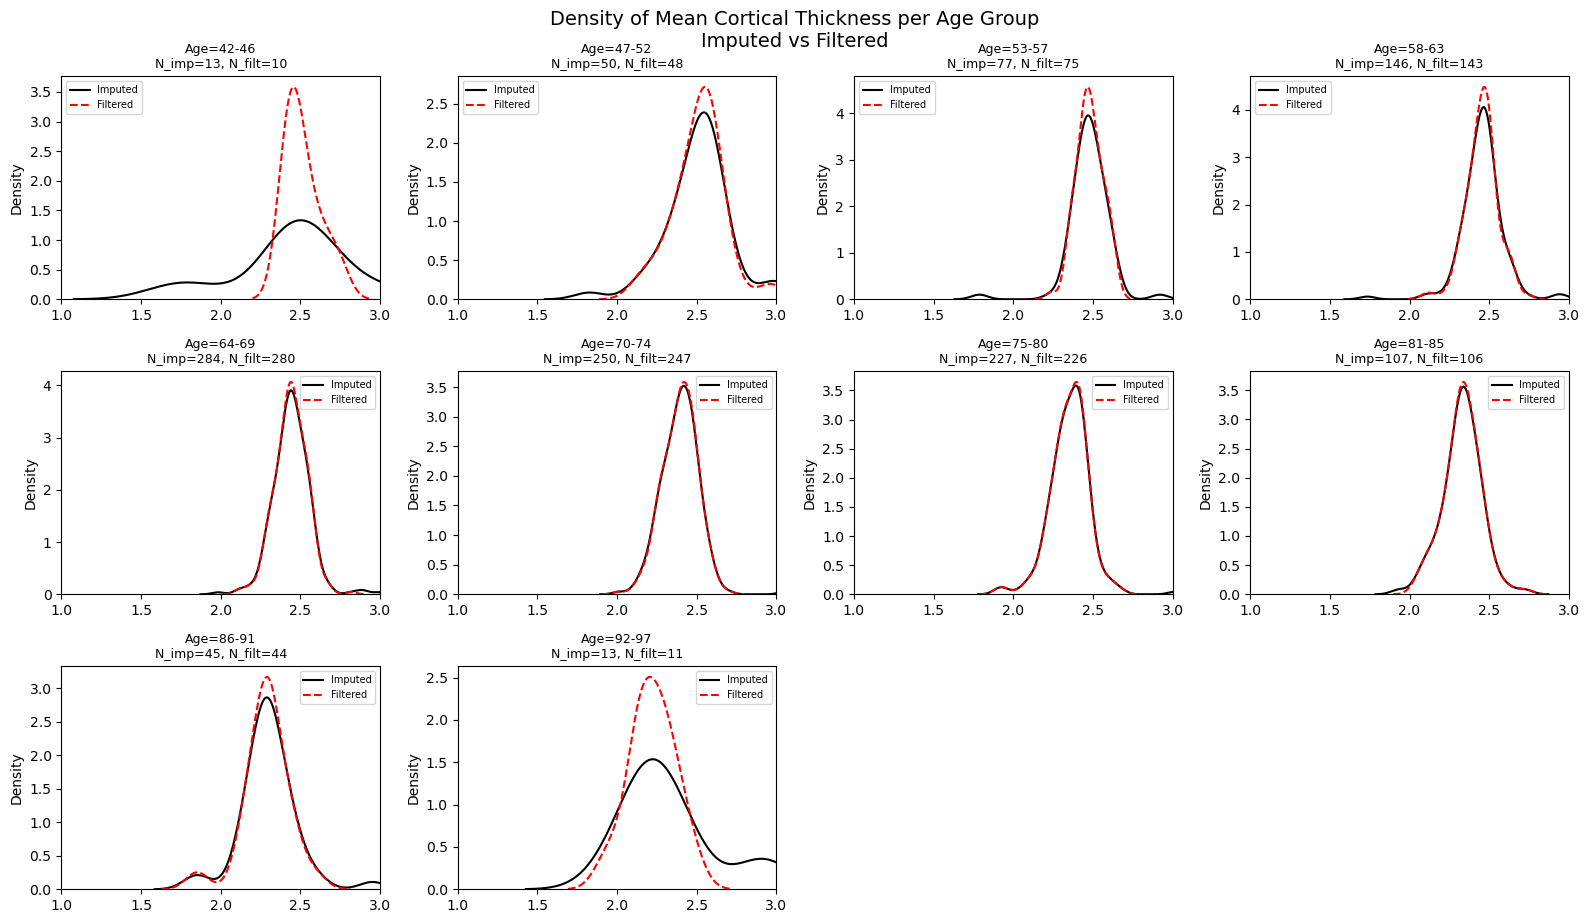

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute mean cortical thickness per subject
thickness_cols = [col for col in X_ct.columns if col not in ["age", "age_group", "is_outlier", "lof_score"]]
X_ct_imp["mean_thickness"] = X_ct_imp[thickness_cols].mean(axis=1)
X_ct_filtered["mean_thickness"] = X_ct_filtered[thickness_cols].mean(axis=1)

# Get unique age groups
age_groups = sorted(X_ct_imp["age_group"].dropna().unique())

# Set up FacetGrid manually
n_cols = 4
n_rows = int(np.ceil(len(age_groups) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    ax = axes[i]
    
    # Subset data
    imp_data = X_ct_imp[X_ct_imp["age_group"] == age_group]["mean_thickness"].dropna()
    filt_data = X_ct_filtered[X_ct_filtered["age_group"] == age_group]["mean_thickness"].dropna()
    
    # Plot KDEs
    sns.kdeplot(imp_data, color="black", lw=1.5, label="Imputed", ax=ax)
    sns.kdeplot(filt_data, color="red", lw=1.5, linestyle="--", label="Filtered", ax=ax)
    
    # Title with sample sizes
    ax.set_title(f"Age={age_group}\nN_imp={len(imp_data)}, N_filt={len(filt_data)}", fontsize=9)
    ax.set_xlim(1, 3)
    ax.set_ylabel("Density")
    ax.set_xlabel("")
    ax.legend(fontsize=7)

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.suptitle("Density of Mean Cortical Thickness per Age Group\nImputed vs Filtered", fontsize=14, y=1.02)
plt.show()


/tmp/ipykernel_14491/3501843040.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df_tmp.groupby(['age_group', 'rep_age']).agg(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy sho

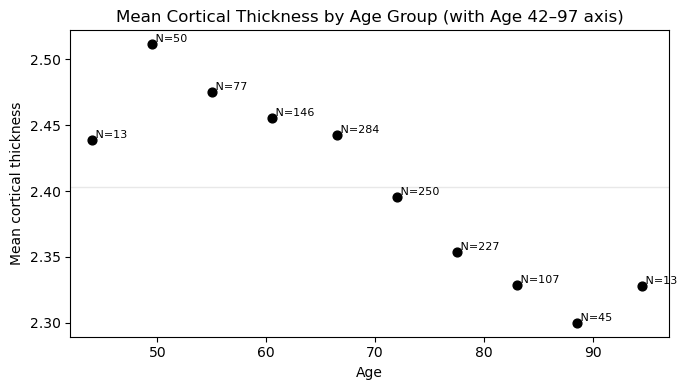

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

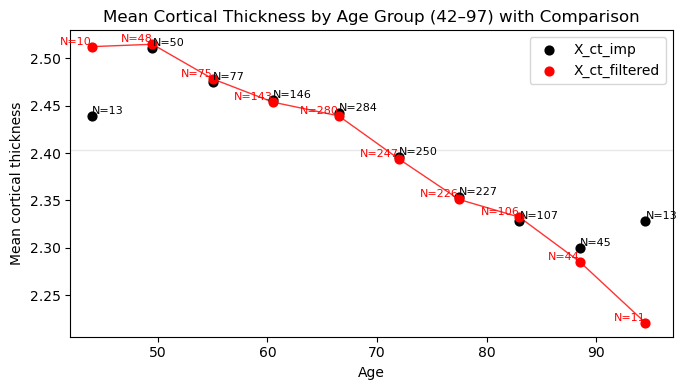

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assumptions:
# - X_ct_imp has columns: 'mean_thickness' (already computed), 'age', 'age_group'
# - age_group is an ordinal/categorical that corresponds to age bins (e.g., "45-49", 45, or similar)

df = X_ct_imp[['mean_thickness', 'age', 'age_group']].dropna()

# Choose a representative age per group:
# Option A: midpoint from string bins like "45-49"
def parse_group_to_mid(g):
    if isinstance(g, str) and '-' in g:
        a, b = g.split('-')
        try:
            return (float(a) + float(b)) / 2.0
        except:
            return np.nan
    try:
        return float(g)
    except:
        return np.nan

rep_age = df['age_group'].apply(parse_group_to_mid)
if rep_age.isna().all():
    # Fallback Option B: use the mean 'age' within each group
    group_stats = df.groupby('age_group').agg(
        mean_thickness=('mean_thickness', 'mean'),
        rep_age=('age', 'mean'),
        N=('mean_thickness', 'size')
    ).reset_index()
else:
    # Use parsed representative ages
    df_tmp = df.copy()
    df_tmp['rep_age'] = rep_age
    group_stats = df_tmp.groupby(['age_group', 'rep_age']).agg(
        mean_thickness=('mean_thickness', 'mean'),
        N=('mean_thickness', 'size')
    ).reset_index()

# Build an age linspace for the x-axis range
age_min, age_max = 42, 97
age_grid = np.linspace(age_min, age_max, 200)

# Plot
plt.figure(figsize=(7,4))
# Draw a faint baseline along the requested age range for reference
plt.plot(age_grid, np.full_like(age_grid, group_stats['mean_thickness'].mean()), 
         color='lightgray', lw=1, alpha=0.5)

# Scatter the group means vs. representative age
plt.scatter(group_stats['rep_age'], group_stats['mean_thickness'], 
            s=40, color='black', zorder=3)

# Optionally connect points by increasing age for readability
order = np.argsort(group_stats['rep_age'])
plt.plot(group_stats['rep_age'].values[order], 
         group_stats['mean_thickness'].values[order], 
         color='black', lw=1, alpha=0.8)

# Annotate with N per point
for _, r in group_stats.iterrows():
    plt.text(r['rep_age'], r['mean_thickness'], f" N={int(r['N'])}", 
             fontsize=8, va='bottom', ha='left')

plt.xlim(age_min, age_max)
plt.xlabel("Age")
plt.ylabel("Mean cortical thickness")
plt.title("Mean Cortical Thickness by Age Group (with Age 42–97 axis)")
plt.tight_layout()
plt.show()





# Prepare X_ct_filtered in the same way
df_filt = X_ct_filtered[['mean_thickness', 'age', 'age_group']].dropna()
rep_age_filt = df_filt['age_group'].apply(parse_group_to_mid)

if rep_age_filt.isna().all():
    group_stats_filt = df_filt.groupby('age_group').agg(
        mean_thickness=('mean_thickness', 'mean'),
        rep_age=('age', 'mean'),
        N=('mean_thickness', 'size')
    ).reset_index()
else:
    df_filt['rep_age'] = rep_age_filt
    group_stats_filt = df_filt.groupby(['age_group', 'rep_age']).agg(
        mean_thickness=('mean_thickness', 'mean'),
        N=('mean_thickness', 'size')
    ).reset_index()

# Plot
plt.figure(figsize=(7,4))

# Faint baseline
plt.plot(age_grid, np.full_like(age_grid, group_stats['mean_thickness'].mean()), 
         color='lightgray', lw=1, alpha=0.5)

# Scatter and line for X_ct_imp
order_imp = np.argsort(group_stats['rep_age'])
plt.scatter(group_stats['rep_age'], group_stats['mean_thickness'], 
            s=40, color='black', zorder=3, label='X_ct_imp')
plt.plot(group_stats['rep_age'].values[order_imp], 
         group_stats['mean_thickness'].values[order_imp], 
         color='black', lw=1, alpha=0.8)

# Scatter and line for X_ct_filtered
order_filt = np.argsort(group_stats_filt['rep_age'])
plt.scatter(group_stats_filt['rep_age'], group_stats_filt['mean_thickness'], 
            s=40, color='red', zorder=3, label='X_ct_filtered')
plt.plot(group_stats_filt['rep_age'].values[order_filt], 
         group_stats_filt['mean_thickness'].values[order_filt], 
         color='red', lw=1, alpha=0.8)

# Annotate N for X_ct_imp
for _, r in group_stats.iterrows():
    plt.text(r['rep_age'], r['mean_thickness'], f"N={int(r['N'])}", 
             fontsize=8, va='bottom', ha='left')

# Annotate N for X_ct_filtered
for _, r in group_stats_filt.iterrows():
    plt.text(r['rep_age'], r['mean_thickness'], f"N={int(r['N'])}", 
             fontsize=8, va='bottom', ha='right', color='red')

plt.xlim(age_min, age_max)
plt.xlabel("Age")
plt.ylabel("Mean cortical thickness")
plt.title("Mean Cortical Thickness by Age Group (42–97) with Comparison")
plt.legend()
plt.tight_layout()
plt.show()



## __Sparse Group Lasso (SGL) on inliers__

In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from groupyr import SGLCV

# X_ct_filtered: pandas DataFrame of features (columns = features)
# y_filtered: pandas Series/array of ages

# 1) Remove non-feature columns if present
cols_to_drop = [c for c in ['age', 'age_group', 'lof_score', 'is_outlier'] if c in X_ct_filtered.columns]
X_ct_filtered = X_ct_filtered.drop(columns=cols_to_drop)

# 2) Standardize features
scaler = StandardScaler()
X_ct_scaled = scaler.fit_transform(X_ct_filtered.values)
feature_names = X_ct_filtered.columns.to_numpy()

# 3) Build correlation-based distance between features
# Use only training data to avoid leakage (split first)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_ct_scaled, y_filtered, test_size=0.2, random_state=42)

# Correlation among features computed on training data
corr = np.corrcoef(X_train_full, rowvar=False)  # shape (p, p)
# Numerical safety
corr = np.clip(corr, -1.0, 1.0)
# Distance matrix: 1 - |r|
dist = 1.0 - np.abs(corr)
# Convert to condensed form for linkage
condensed = squareform(dist, checks=False)

# 4) Hierarchical clustering to form groups
Z = linkage(condensed, method='average')  # average linkage is stable for correlation distances

# Heuristic to select number of clusters:
# Aim for median cluster size ~ 15–30 as a proxy for lobe-sized groups in the paper.
p = corr.shape[0]
target_avg_size = 20  # tweak to your data
k = max(2, int(round(p / target_avg_size)))

# Alternatively, choose by distance threshold on dendrogram (commented):
# from scipy.cluster.hierarchy import inconsistent
# inc = inconsistent(Z)
# t = np.percentile(Z[:,2], 60)  # e.g., 60th percentile distance
# labels = fcluster(Z, t=t, criterion='distance')

labels = fcluster(Z, t=k, criterion='maxclust')  # labels in 1..k

# 5) Build groups list of index arrays for groupyr
groups = []
for g_id in sorted(np.unique(labels)):
    idx = np.where(labels == g_id)[0]
    groups.append(idx)

# 6) Fit SGL with cross-validation on the same train/test split used for correlation computation
sgl = SGLCV(groups=groups, l1_ratio=0.5, cv=5, verbose=1, random_state=42)
sgl.fit(X_train_full, y_train)

coef = sgl.coef_
print("Nonzero coefficients:", np.sum(coef != 0))

score = sgl.score(X_test_full, y_test)
print("R^2 on test set:", score)


Nonzero coefficients: 56
R^2 on test set: 0.43704965439826904


In [127]:
feature_names = X_ct_filtered.columns

nonzero_features = feature_names[sgl.coef_ != 0]

X_sgl_scaled = pd.DataFrame(X_ct_scaled, columns=feature_names)[nonzero_features]

display(X_sgl_scaled)

,x18,x21,x23,x42,x92,x107,x114,x144,x168,x172,...,x712,x721,x734,x745,x748,x766,x769,x777,x801,x828
0,0.679047,-1.167116,0.646831,-0.938604,0.330830,-0.348591,0.703476,-0.575097,-1.087526,1.333859,...,1.241764,0.761215,0.706644,0.075294,1.207424,0.286991,0.339751,0.314731,-0.447149,-0.131297
1,0.088288,1.430030,-0.138381,-0.277480,-0.786045,0.987578,2.049350,0.838095,-0.058629,0.979557,...,1.235407,0.192411,0.484154,0.897715,0.325491,1.120516,-1.289858,0.452942,0.062857,-1.739571
2,-0.165875,-0.605476,-0.000458,0.958386,0.667742,0.731418,-1.483545,0.948229,0.175604,0.344803,...,0.140031,-0.208574,1.077725,-0.089777,-0.059578,0.441455,0.345824,0.114852,0.651440,0.473439
3,-0.273175,-0.424987,-2.003738,0.340231,0.286110,-1.805900,-1.235654,-1.112153,-0.167394,-2.019668,...,-2.067054,-1.580521,-2.023225,-1.625786,-2.254511,-2.128408,-1.788111,-1.549977,-1.676446,0.029630
4,0.006857,1.159766,-0.298211,1.267067,0.695916,-0.082580,1.329897,-0.049137,0.869243,0.064879,...,-0.252828,0.348914,-1.121848,-0.051728,-0.359633,-0.129297,-0.708318,-0.525902,-0.713854,-0.087244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.223113,1.724881,1.077617,1.403703,0.084732,0.469274,2.251209,0.666302,1.305669,1.713178,...,0.442197,0.531262,0.172260,1.020523,0.643099,0.534692,-0.261821,0.731860,1.011853,1.411348
1186,-0.041905,0.065088,-0.872961,0.548820,0.178575,-0.071859,0.368809,0.351958,1.128052,0.362079,...,-0.580278,-0.364099,-0.826567,-0.460218,0.046914,-0.900899,0.169111,-0.329603,-0.438472,0.837173
1187,0.406440,2.478317,0.919074,0.542276,-0.490721,1.148118,1.452276,0.304804,0.384243,1.217490,...,1.033171,-0.170089,0.996642,1.441596,0.450133,1.938066,0.548598,0.667088,0.914631,0.328407
1188,-0.336976,-0.368740,-0.064735,0.551607,0.010181,1.045516,0.265469,-0.435532,-1.311838,0.409154,...,0.159089,-1.451057,-0.065320,0.127721,-0.381852,1.081268,0.316469,0.472029,0.752892,0.027682


## __Gaussian Process Regression (GPR)__

In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.metrics import r2_score

# Assume y is your target variable
# y = ...

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_sgl_scaled, y_filtered, test_size=0.2, random_state=42
)

# Define kernels to search
kernel_options = [
    C(1.0) * RBF(length_scale=1.0),
    C(1.0) * Matern(length_scale=1.0, nu=1.5),
    C(1.0) * Matern(length_scale=1.0, nu=2.5)
]

# Prepare parameter grid for tuning
param_grid = {
    'kernel': kernel_options,
    'alpha': [1e-10, 1e-5, 1e-2, 1e-1],  # noise level
    'normalize_y': [True, False]
}

# Use GridSearchCV to tune GPR
gpr = GaussianProcessRegressor()
grid = GridSearchCV(
    estimator=gpr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=4
)

# Fit model
grid.fit(X_train, y_train)

# Best model
best_gpr = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Predict on test set
y_pred = best_gpr.predict(X_test)

# Evaluate R^2
r2 = r2_score(y_test, y_pred)
print("R^2 on test set:", r2)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 3/5] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-58.063 total time=   1.1s
[CV 4/5] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-55.582 total time=   0.8s
[CV 2/5] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-47.763 total time=   1.0s
[CV 1/5] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-60.237 total time=   1.3s
[CV 5/5] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-43.594 total time=   1.1s
[CV 5/5] END alpha=1e-10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=-0.001 total time=   3.4s
[CV 1/5] END alpha=1e-10, kernel=1**2 * Matern(length_scale=1, nu=2.5), normalize_y=False;, score=-59.056 total time=   0.7s
[CV 2/5] END alpha=1e-10, kernel=1**2 * Matern(length_scale=1, nu=2.5), normalize_y=False;, score=-46.752 total time=   

/home/ivan/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/ivan/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV 3/5] END alpha=0.1, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-59.081 total time=   3.9s
[CV 5/5] END alpha=0.1, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-44.152 total time=   3.3s
[CV 4/5] END alpha=0.1, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-56.515 total time=   4.8s
[CV 2/5] END alpha=0.1, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-48.443 total time=   5.8s
[CV 1/5] END alpha=0.1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=0.367 total time=   4.2s
[CV 2/5] END alpha=0.1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-48.443 total time=   3.1s
[CV 3/5] END alpha=0.1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=0.377 total time=   4.2s
[CV 4/5] END alpha=0.1, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.005 total time=   8.2s
[CV 4/5] END alpha=0.1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize

## __Stacking__


=== Individual Base Model Performance ===
XGBoost         -> Test R²: 0.5596 | Test MSE: 40.2487
CatBoost        -> Test R²: 0.5357 | Test MSE: 42.4260
gbr             -> Test R²: 0.5590 | Test MSE: 40.3023
RandomForest    -> Test R²: 0.4753 | Test MSE: 47.9498
Train MSE: 3.5009363439714685
Train R² : 0.9617517347790716
Test MSE : 41.87232872919802
Test R²  : 0.5417944718764016


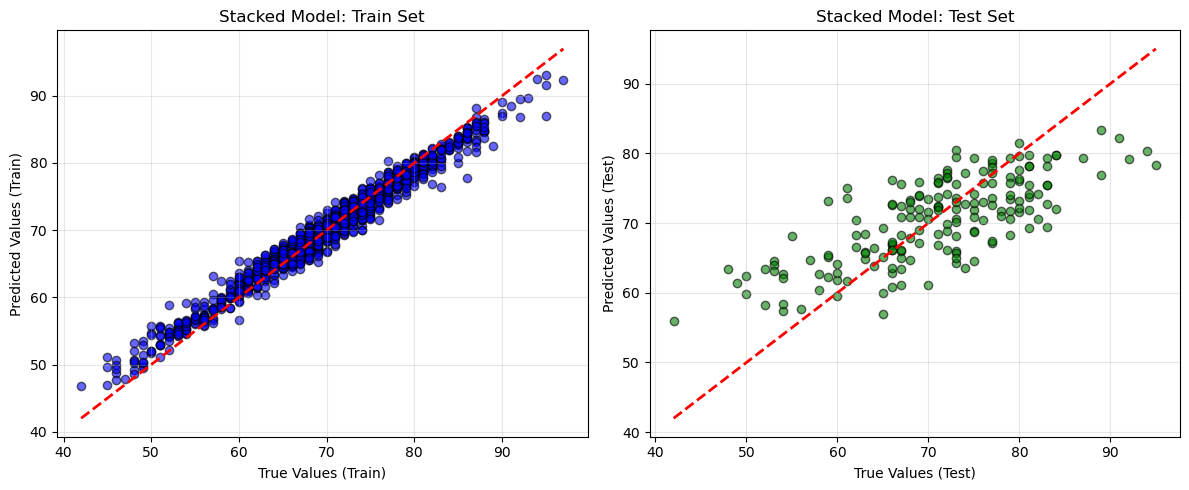

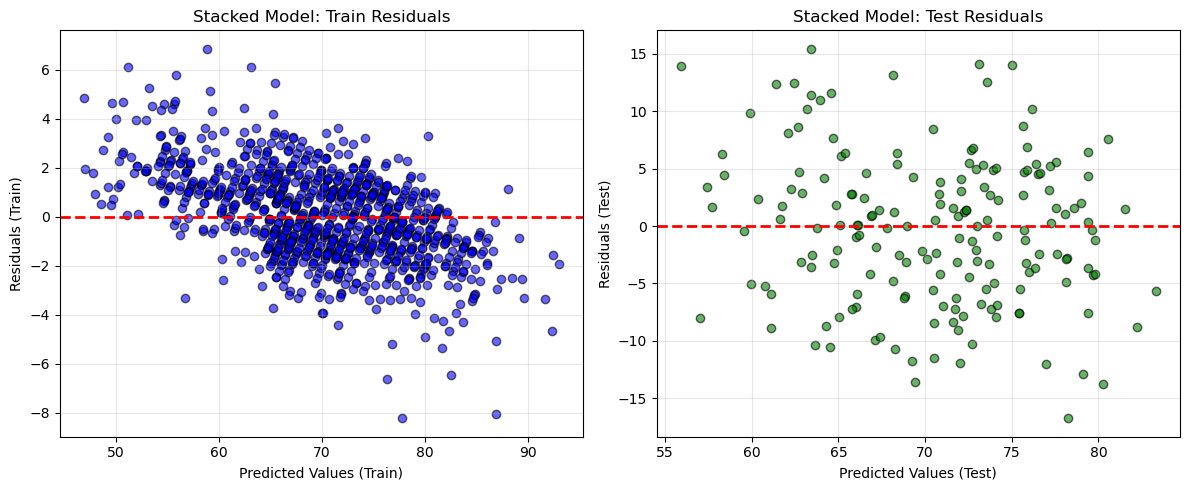

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X_sgl_scaled, y_filtered, test_size=0.15, random_state=42)


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    learning_rate=0.05,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    verbosity=0
)

cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3,
    subsample=0.7,
    random_seed=42,
    verbose=0
)

gbr_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
)

stack = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('cat', cat_model),
        ('gbr',gbr_model),
        ('rf', rf_model),
    ],
    final_estimator=Ridge(alpha=5.0),
    cv=5,
    n_jobs=-1,
    passthrough=False  
)


models = {
    "XGBoost": xgb_model,
    "CatBoost": cat_model,
    # "ada": ada_model,
    "gbr": gbr_model,
    "RandomForest": rf_model,
    # "SVR": svr_model,

}

print("\n=== Individual Base Model Performance ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name:15s} -> Test R²: {r2:.4f} | Test MSE: {mse:.4f}")

stack.fit(X_train, y_train)

y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Train R² :", r2_score(y_train, y_pred_train))
print("Test MSE :", mean_squared_error(y_test, y_pred_test))
print("Test R²  :", r2_score(y_test, y_pred_test))


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', edgecolor='k')
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val,max_val], [min_val,max_val], 'r--', lw=2)
plt.xlabel("True Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Stacked Model: Train Set")
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green', edgecolor='k')
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val,max_val], [min_val,max_val], 'r--', lw=2)
plt.xlabel("True Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Stacked Model: Test Set")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
residuals_train = y_pred_train - y_train
plt.scatter(y_pred_train, residuals_train, alpha=0.6, color='blue', edgecolor='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Stacked Model: Train Residuals")
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
residuals_test = y_pred_test - y_test
plt.scatter(y_pred_test, residuals_test, alpha=0.6, color='green', edgecolor='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Stacked Model: Test Residuals")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## __Stacking with bias correction__


=== Uncorrected ===
Train  (raw)     -> R²: 0.9575 | MSE: 4.0566
Cal    (raw)     -> R²: 0.4029 | MSE: 50.0327
Test   (raw)     -> R²: 0.4012 | MSE: 52.3590

=== Bias-corrected (fitted on Cal) ===
Train  (corr)    -> R²: 0.7909 | MSE: 19.9693
Cal    (corr)    -> R²: 0.7322 | MSE: 22.4392
Test   (corr)    -> R²: 0.7579 | MSE: 21.1712


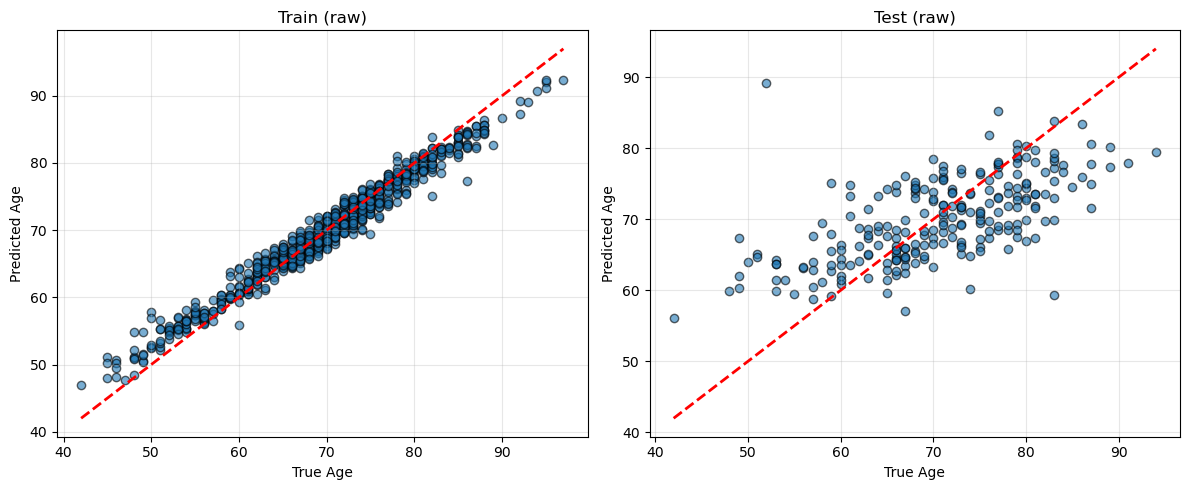

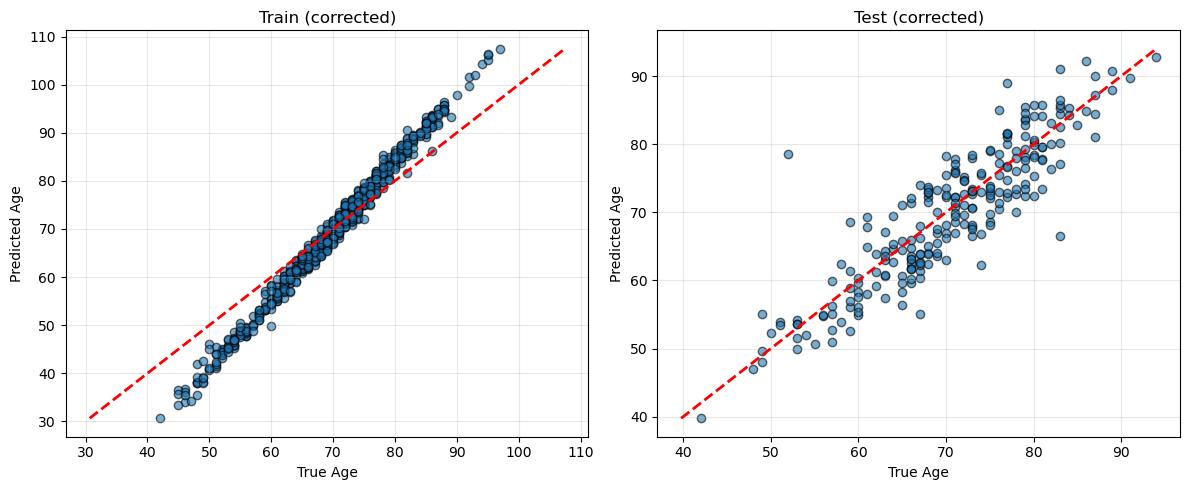

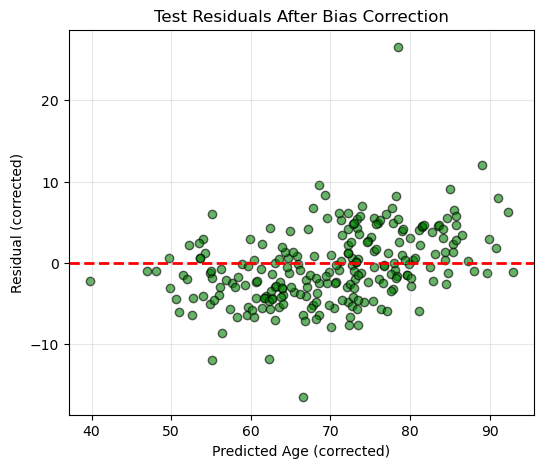

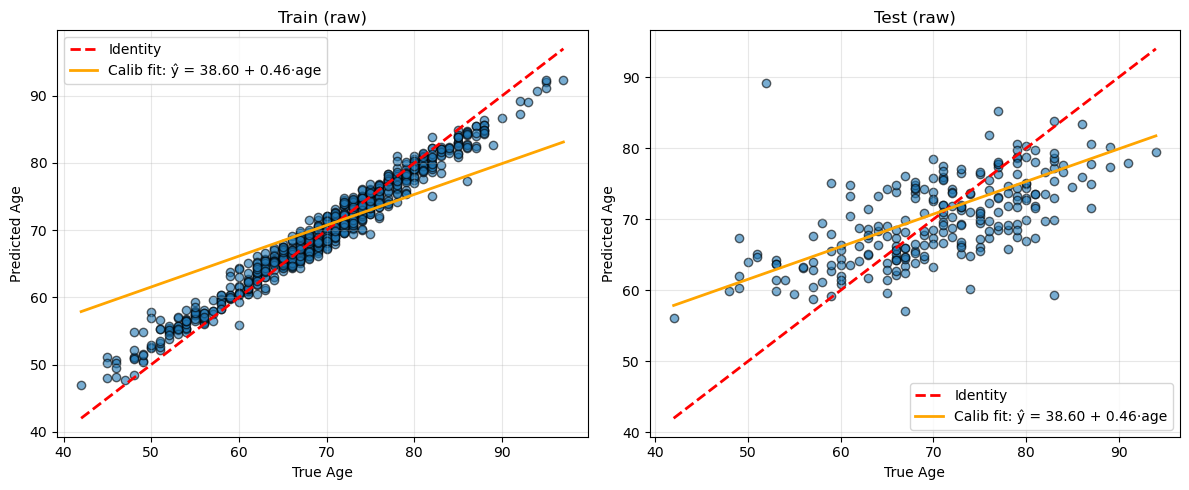

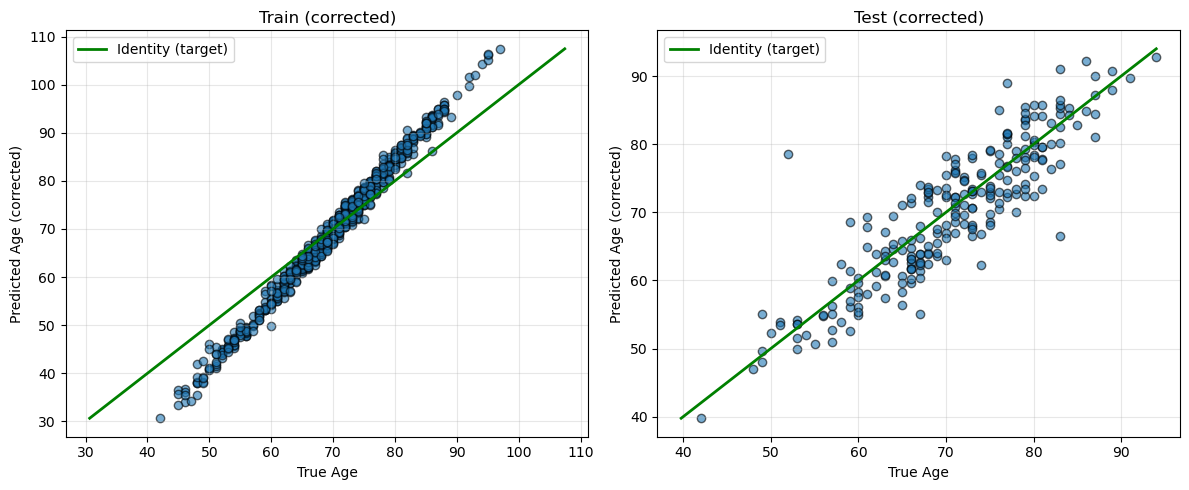

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# ---------- primary split: Train vs. Held-out (Calib+Test) ----------
X_tr, X_hold, y_tr, y_hold = train_test_split(
    X_sgl_scaled, y_filtered, test_size=0.40, random_state=42, stratify=None
)  # 70% train, 30% held-out [attached_file:1]

# ---------- split held-out into Calibration and Test ----------
X_cal, X_test, y_cal, y_test = train_test_split(
    X_hold, y_hold, test_size=0.50, random_state=42, stratify=None
)  # 15% calib, 15% test overall [attached_file:1]

# ---------- base learners ----------
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    learning_rate=0.05,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    verbosity=0
)  # [attached_file:1]

cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3,
    subsample=0.7,
    random_seed=42,
    verbose=0
)  # [attached_file:1]

gbr_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    random_state=42
)  # [attached_file:1]

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
)  # [attached_file:1]

# ---------- stack ----------
stack = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('cat', cat_model),
        ('gbr', gbr_model),
        ('rf', rf_model),
    ],
    final_estimator=Ridge(alpha=5.0),
    cv=5,
    n_jobs=-1,
    passthrough=False
)  # [attached_file:1]

# ---------- fit stack on training data ----------
stack.fit(X_tr, y_tr)  # [attached_file:1]

# ---------- predictions on train/calib/test ----------
y_pred_tr = stack.predict(X_tr)  # [attached_file:1]
y_pred_cal = stack.predict(X_cal)  # [attached_file:1]
y_pred_test = stack.predict(X_test)  # [attached_file:1]

# ---------- bias calibration (linear) on calibration set ----------
# On calibration split
delta_cal = y_pred_cal - y_cal
lin = LinearRegression().fit(y_cal.reshape(-1,1), delta_cal)
alpha_d = lin.intercept_; beta_d = lin.coef_[0]  # delta = alpha_d + beta_d * age

def correct_delta(pred, age, a_d, b_d):
    return pred - (a_d + b_d * age)

y_pred_tr_corr   = correct_delta(y_pred_tr,   y_tr,   alpha_d, beta_d)
y_pred_cal_corr  = correct_delta(y_pred_cal,  y_cal,  alpha_d, beta_d)
y_pred_test_corr = correct_delta(y_pred_test, y_test, alpha_d, beta_d)


# ---------- metrics ----------
def report(split, y_true, y_hat, note):
    mse = mean_squared_error(y_true, y_hat)
    r2 = r2_score(y_true, y_hat)
    print(f"{split:6s} {note:9s} -> R²: {r2:.4f} | MSE: {mse:.4f}")

print("\n=== Uncorrected ===")
report("Train", y_tr, y_pred_tr, "(raw)")  # [attached_file:1]
report("Cal",   y_cal, y_pred_cal, "(raw)")  # [attached_file:1]
report("Test",  y_test, y_pred_test, "(raw)")  # [attached_file:1]

print("\n=== Bias-corrected (fitted on Cal) ===")
report("Train", y_tr, y_pred_tr_corr, "(corr)")  # [attached_file:1]
report("Cal",   y_cal, y_pred_cal_corr, "(corr)")  # [attached_file:1]
report("Test",  y_test, y_pred_test_corr, "(corr)")  # [attached_file:1]

# ---------- diagnostic plots ----------
import matplotlib.pyplot as plt

def diag_scatter(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.xlabel("True Age")
    plt.ylabel("Predicted Age")
    plt.title(title)
    plt.grid(alpha=0.3)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); diag_scatter(y_tr, y_pred_tr, "Train (raw)"); 
plt.subplot(1,2,2); diag_scatter(y_test, y_pred_test, "Test (raw)");
plt.tight_layout(); plt.show()  # [attached_file:1]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); diag_scatter(y_tr, y_pred_tr_corr, "Train (corrected)"); 
plt.subplot(1,2,2); diag_scatter(y_test, y_pred_test_corr, "Test (corrected)");
plt.tight_layout(); plt.show()  # [attached_file:1]

# Residual vs. predicted after correction (optional)
res_test_corr = y_pred_test_corr - y_test
plt.figure(figsize=(6,5))
plt.scatter(y_pred_test_corr, res_test_corr, alpha=0.6, edgecolor='k', color='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Age (corrected)")
plt.ylabel("Residual (corrected)")
plt.title("Test Residuals After Bias Correction")
plt.grid(alpha=0.3)
plt.show()  # [attached_file:1]


# After computing a, b from calibration and generating y_pred_* and y_pred_*_corr

def diag_scatter_with_fit(y_true, y_pred, title, a=None, b=None, show_fit=True):
    import numpy as np
    import matplotlib.pyplot as plt
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())
    # identity
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2, label='Identity')
    # fitted line: predicted = a + b * true  (only if provided)
    if show_fit and (a is not None) and (b is not None):
        xs = np.linspace(lo, hi, 100)
        ys = a + b * xs
        plt.plot(xs, ys, color='orange', lw=2, label=f'Calib fit: ŷ = {a:.2f} + {b:.2f}·age')
    plt.xlabel("True Age")
    plt.ylabel("Predicted Age")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)

# Raw predictions with fitted line (fit derived from calibration set)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); diag_scatter_with_fit(y_tr, y_pred_tr, "Train (raw)", a, b, show_fit=True)    # [attached_file:1]
plt.subplot(1,2,2); diag_scatter_with_fit(y_test, y_pred_test, "Test (raw)", a, b, show_fit=True) # [attached_file:1]
plt.tight_layout(); plt.show()

# After correction, plot corrected predictions against identity and the "corrected fit" (which is identity)
# For visualization, show how the calibration mapping would transform a line:
def diag_scatter_corrected(y_true, y_pred_corr, title):
    import numpy as np
    import matplotlib.pyplot as plt
    plt.scatter(y_true, y_pred_corr, alpha=0.6, edgecolor='k')
    lo = min(y_true.min(), y_pred_corr.min())
    hi = max(y_true.max(), y_pred_corr.max())
    # Identity line (target after correction)
    plt.plot([lo, hi], [lo, hi], 'g-', lw=2, label='Identity (target)')
    plt.xlabel("True Age")
    plt.ylabel("Predicted Age (corrected)")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); diag_scatter_corrected(y_tr, y_pred_tr_corr, "Train (corrected)")   # [attached_file:1]
plt.subplot(1,2,2); diag_scatter_corrected(y_test, y_pred_test_corr, "Test (corrected)")# [attached_file:1]
plt.tight_layout(); plt.show()
